In [208]:
import numpy as np
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

In [209]:
iris = datasets.load_iris()

In [210]:
iris 

{'DESCR': '.. _iris_dataset:\n\nIris plants dataset\n--------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n                \n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)\n    ===========

In [211]:
iris["feature_names"]

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [212]:
iris["target"]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [213]:
iris["target_names"]

array(['setosa', 'versicolor', 'virginica'], dtype='|S10')

In [214]:
X = iris["data"][:,(2,3)] # petal length, petal width

In [215]:
y = (iris["target"] == 2).astype(np.float64) #iris -virginica

In [216]:
svm_clf = Pipeline((
               ("scaler", StandardScaler()),
               ("linear_svc", LinearSVC(C=1,loss="hinge")),
))

svm_clf.fit(X,y)

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('linear_svc', LinearSVC(C=1, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
     penalty='l2', random_state=None, tol=0.0001, verbose=0))])

In [217]:
X[50]

array([4.7, 1.4])

In [218]:
y[50]

0.0

In [219]:
#try to visualise iris dataset
%matplotlib inline
import matplotlib.pyplot as plt



In [220]:
X_petal_length = X[:,0]
X_petal_width = X[:,1]

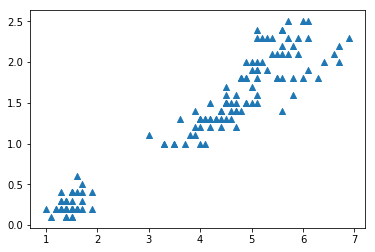

In [221]:
plt.scatter(X_petal_length,X_petal_width,marker = '^')
# that is wrong as this prints all not category of iris

Text(0,0.5,'petal width')

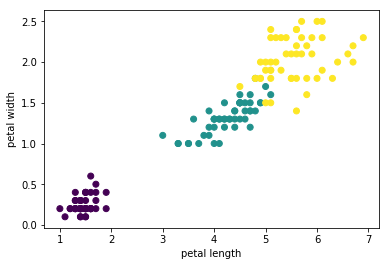

In [222]:
iris = datasets.load_iris()
X = iris["data"][:,(2,3)] 
y = iris["target"]
plt.scatter(X[:, 0], X[:, 1],marker = 'o',c=y)
plt.xlabel('petal length')
plt.ylabel('petal width')

Text(0,0.5,'Sepal width')

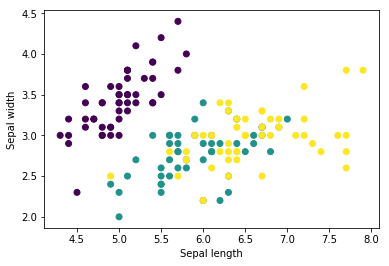

In [223]:
X = iris["data"][:,:2] 
y = iris["target"]
plt.scatter(X[:, 0], X[:, 1],marker = 'o',c=y)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

In [224]:
# lets start with moon dataset

In [225]:
make_moons_data = make_moons(n_samples=100, shuffle=True, noise=None, random_state=None)
X= make_moons_data[0]
y = make_moons_data[1]

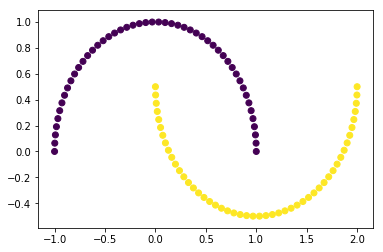

In [226]:
plt.scatter(X[:, 0], X[:, 1],marker = 'o',c=y)


In [261]:
from sklearn.datasets import make_moons
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

polynomial_svm_clf = Pipeline((
     ("poly_features", PolynomialFeatures(degree=6)),
     ("scaler", StandardScaler()),
     ("svm_clf", LinearSVC(C=10, loss="hinge"))
))

In [262]:
polynomial_svm_clf.fit(X,y)

Pipeline(memory=None,
     steps=[('poly_features', PolynomialFeatures(degree=6, include_bias=True, interaction_only=False)), ('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svm_clf', LinearSVC(C=10, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
     penalty='l2', random_state=None, tol=0.0001, verbose=0))])

In [263]:
X[5],y[5]

(array([-0.1595999 ,  0.98718178]), 0)

In [264]:
polynomial_svm_clf.predict([X[5]])

array([0], dtype=int64)

In [265]:
decision = polynomial_svm_clf.decision_function(X)
decision
score = polynomial_svm_clf.score(X,y)
print(score)


1.0


In [266]:
# lets try to visualize how data looks like after polynomial
poly_features = PolynomialFeatures(degree=6)
x_poly = poly_features.fit_transform(X)
x_poly.shape

(100L, 28L)

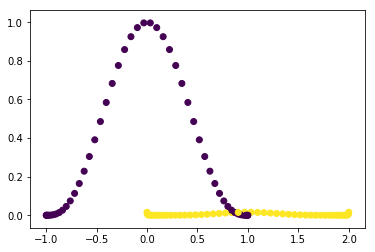

In [267]:
plt.scatter(x_poly[:, 1], x_poly[:, 27],marker = 'o',c=y)

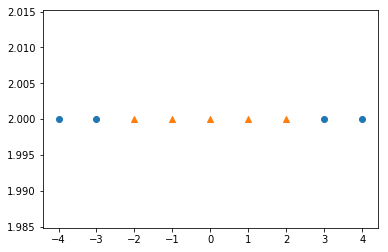

In [274]:
# printing book nonlinear example
#x1 = [[-4,2],[-3,2],[3,2],[4,2]]
#x2 = [[-2,2],[-1,2],[0,2],[1,2],[2,2]]
x1 = [-4,-3,3,4]
y1 = [2,2,2,2]
x2=[-2,-1,0,1,2]
y2 = [2,2,2,2,2]
#plt.plot(x1,y1)
plt.scatter(x1,y1,marker = 'o')
plt.scatter(x2,y2,marker = '^')


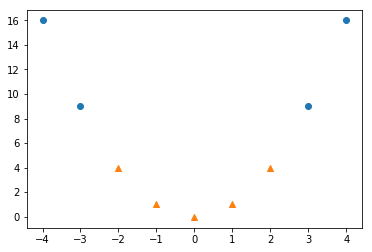

In [275]:
# printing book nonlinear example
#x1 = [[-4,2],[-3,2],[3,2],[4,2]]
#x2 = [[-2,2],[-1,2],[0,2],[1,2],[2,2]]
x1 = [-4,-3,3,4]
y1 = [16,9,9,16]
x2=[-2,-1,0,1,2]
y2 = [4,1,0,1,4]
#plt.plot(x1,y1)
plt.scatter(x1,y1,marker = 'o')
plt.scatter(x2,y2,marker = '^')

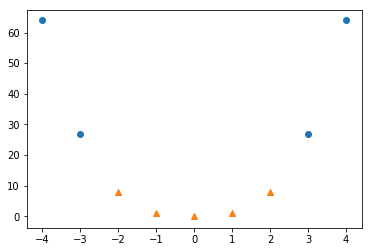

In [276]:
x1 = [-4,-3,3,4]
y1 = [64,27,27,64]
x2=[-2,-1,0,1,2]
y2 = [8,1,0,1,8]
#plt.plot(x1,y1)
plt.scatter(x1,y1,marker = 'o')
plt.scatter(x2,y2,marker = '^')